In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
df = pd.read_csv("/content/drive/MyDrive/DMML PROJECT/desies_file.csv")


In [49]:
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,110,1.020,3,0,1,60.0,5.49,132.4,5.47,6.97,16127,4.21,3.62,1
1,120,1.015,0,3,1,174.0,8.91,132.7,4.45,9.77,12279,5.56,2.94,0
2,120,1.020,2,4,1,90.0,4.31,122.2,3.86,7.91,9426,4.64,3.79,1
3,110,1.025,1,4,1,27.0,6.04,133.9,4.41,9.58,8791,4.85,4.58,1
4,120,1.020,5,0,1,147.0,2.92,133.4,6.34,5.09,16551,4.24,2.83,1


In [50]:
df.shape

(2495, 14)

In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      2495 non-null   int64  
 1   Sg      2495 non-null   float64
 2   Al      2495 non-null   int64  
 3   Su      2495 non-null   int64  
 4   Rbc     2495 non-null   int64  
 5   Bu      2495 non-null   float64
 6   Sc      2495 non-null   float64
 7   Sod     2495 non-null   float64
 8   Pot     2495 non-null   float64
 9   Hemo    2495 non-null   float64
 10  Wbcc    2495 non-null   int64  
 11  Rbcc    2495 non-null   float64
 12  Htn     2495 non-null   float64
 13  Class   2495 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 273.0 KB


In [52]:
df.isnull().sum().sort_values(ascending=False).head()

,0
Bp,0
Sg,0
Al,0
Su,0
Rbc,0


In [53]:
df=df.drop(['Hemo'], axis = 1)

In [54]:
df['Htn'].fillna(df['Htn'].median(), inplace=True)

/tmp/ipython-input-3909051908.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Htn'].fillna(df['Htn'].median(), inplace=True)


In [55]:
new_df = df.dropna()

In [56]:
new_df

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Wbcc,Rbcc,Htn,Class
0,110,1.020,3,0,1,60.0,5.49,132.40,5.47,16127,4.21,3.62,1
1,120,1.015,0,3,1,174.0,8.91,132.70,4.45,12279,5.56,2.94,0
2,120,1.020,2,4,1,90.0,4.31,122.20,3.86,9426,4.64,3.79,1
3,110,1.025,1,4,1,27.0,6.04,133.90,4.41,8791,4.85,4.58,1
4,120,1.020,5,0,1,147.0,2.92,133.40,6.34,16551,4.24,2.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,71,1.028,1,-1,1,114.0,1.63,138.60,6.46,9239,4.52,0.00,1
2491,105,1.013,1,0,1,73.0,4.61,131.55,3.81,8996,3.59,3.08,1
2492,73,1.022,0,1,1,90.0,6.86,147.39,3.10,10556,4.47,2.29,1
2493,49,1.020,2,2,1,99.0,4.13,148.96,0.00,9858,3.24,2.34,0


In [57]:
new_df.isnull().sum().sort_values(ascending=False).head()

,0
Bp,0
Sg,0
Al,0
Su,0
Rbc,0


In [58]:
new_df=new_df.drop(['Bp','Sg','Su'], axis = 1)

In [59]:
new_df

,Al,Rbc,Bu,Sc,Sod,Pot,Wbcc,Rbcc,Htn,Class
0,3,1,60.0,5.49,132.40,5.47,16127,4.21,3.62,1
1,0,1,174.0,8.91,132.70,4.45,12279,5.56,2.94,0
2,2,1,90.0,4.31,122.20,3.86,9426,4.64,3.79,1
3,1,1,27.0,6.04,133.90,4.41,8791,4.85,4.58,1
4,5,1,147.0,2.92,133.40,6.34,16551,4.24,2.83,1
...,...,...,...,...,...,...,...,...,...,...
2490,1,1,114.0,1.63,138.60,6.46,9239,4.52,0.00,1
2491,1,1,73.0,4.61,131.55,3.81,8996,3.59,3.08,1
2492,0,1,90.0,6.86,147.39,3.10,10556,4.47,2.29,1
2493,2,1,99.0,4.13,148.96,0.00,9858,3.24,2.34,0


In [60]:
x = new_df.drop(['Rbc'], axis = 1)

In [61]:
x

,Al,Bu,Sc,Sod,Pot,Wbcc,Rbcc,Htn,Class
0,3,60.0,5.49,132.40,5.47,16127,4.21,3.62,1
1,0,174.0,8.91,132.70,4.45,12279,5.56,2.94,0
2,2,90.0,4.31,122.20,3.86,9426,4.64,3.79,1
3,1,27.0,6.04,133.90,4.41,8791,4.85,4.58,1
4,5,147.0,2.92,133.40,6.34,16551,4.24,2.83,1
...,...,...,...,...,...,...,...,...,...
2490,1,114.0,1.63,138.60,6.46,9239,4.52,0.00,1
2491,1,73.0,4.61,131.55,3.81,8996,3.59,3.08,1
2492,0,90.0,6.86,147.39,3.10,10556,4.47,2.29,1
2493,2,99.0,4.13,148.96,0.00,9858,3.24,2.34,0


In [62]:
y = new_df['Rbc']

In [63]:
y

,Rbc
0,1
1,1
2,1
3,1
4,1
...,...
2490,1
2491,1
2492,1
2493,1


In [64]:
from sklearn.preprocessing import LabelEncoder
le_x= LabelEncoder()
x.Wbcc = le_x.fit_transform(x.Wbcc)
x.Rbcc = le_x.fit_transform(x.Rbcc)

In [65]:
x

,Al,Bu,Sc,Sod,Pot,Wbcc,Rbcc,Htn,Class
0,3,60.0,5.49,132.40,5.47,1920,157,3.62,1
1,0,174.0,8.91,132.70,4.45,1616,293,2.94,0
2,2,90.0,4.31,122.20,3.86,1020,200,3.79,1
3,1,27.0,6.04,133.90,4.41,869,222,4.58,1
4,5,147.0,2.92,133.40,6.34,1929,160,2.83,1
...,...,...,...,...,...,...,...,...,...
2490,1,114.0,1.63,138.60,6.46,969,188,0.00,1
2491,1,73.0,4.61,131.55,3.81,913,97,3.08,1
2492,0,90.0,6.86,147.39,3.10,1283,183,2.29,1
2493,2,99.0,4.13,148.96,0.00,1119,63,2.34,0


In [66]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3)

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel = LogisticRegression()
logmodel.fit(xtrain,ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
predictions = logmodel.predict(xtest)

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       140
           1       0.79      1.00      0.88       592
           2       0.00      0.00      0.00        17

    accuracy                           0.79       749
   macro avg       0.26      0.33      0.29       749
weighted avg       0.62      0.79      0.70       749



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import  confusion_matrix

In [73]:
print(confusion_matrix(ytest, predictions))

[[  0 140   0]
 [  0 592   0]
 [  0  17   0]]


In [74]:
logmodel.score(xtest,ytest)

0.7903871829105474

# Gausian Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB

In [76]:
gaussian = GaussianNB()
gaussian.fit(xtrain, ytrain)

GaussianNB()

In [77]:
gauss_predicted = gaussian.predict(xtest)

In [78]:
print(classification_report(ytest,gauss_predicted))

              precision    recall  f1-score   support

           0       0.50      0.01      0.01       140
           1       0.79      1.00      0.88       592
           2       0.00      0.00      0.00        17

    accuracy                           0.79       749
   macro avg       0.43      0.34      0.30       749
weighted avg       0.72      0.79      0.70       749



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [79]:
print(confusion_matrix(ytest,gauss_predicted))

[[  1 139   0]
 [  1 591   0]
 [  0  17   0]]


In [80]:
gaussian.score(xtest,ytest)

0.7903871829105474

# Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [82]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [83]:
y_pred=dt.predict(xtest)

In [84]:
print(confusion_matrix(ytest,y_pred))

[[ 34 102   4]
 [121 457  14]
 [  1  14   2]]


In [85]:
accuracy_score(ytest,y_pred)

0.6582109479305741

array([[<Axes: title={'center': 'Bp'}>, <Axes: title={'center': 'Sg'}>,
        <Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Su'}>],
       [<Axes: title={'center': 'Rbc'}>, <Axes: title={'center': 'Bu'}>,
        <Axes: title={'center': 'Sc'}>, <Axes: title={'center': 'Sod'}>],
       [<Axes: title={'center': 'Pot'}>,
        <Axes: title={'center': 'Wbcc'}>,
        <Axes: title={'center': 'Rbcc'}>,
        <Axes: title={'center': 'Htn'}>],
       [<Axes: title={'center': 'Class'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

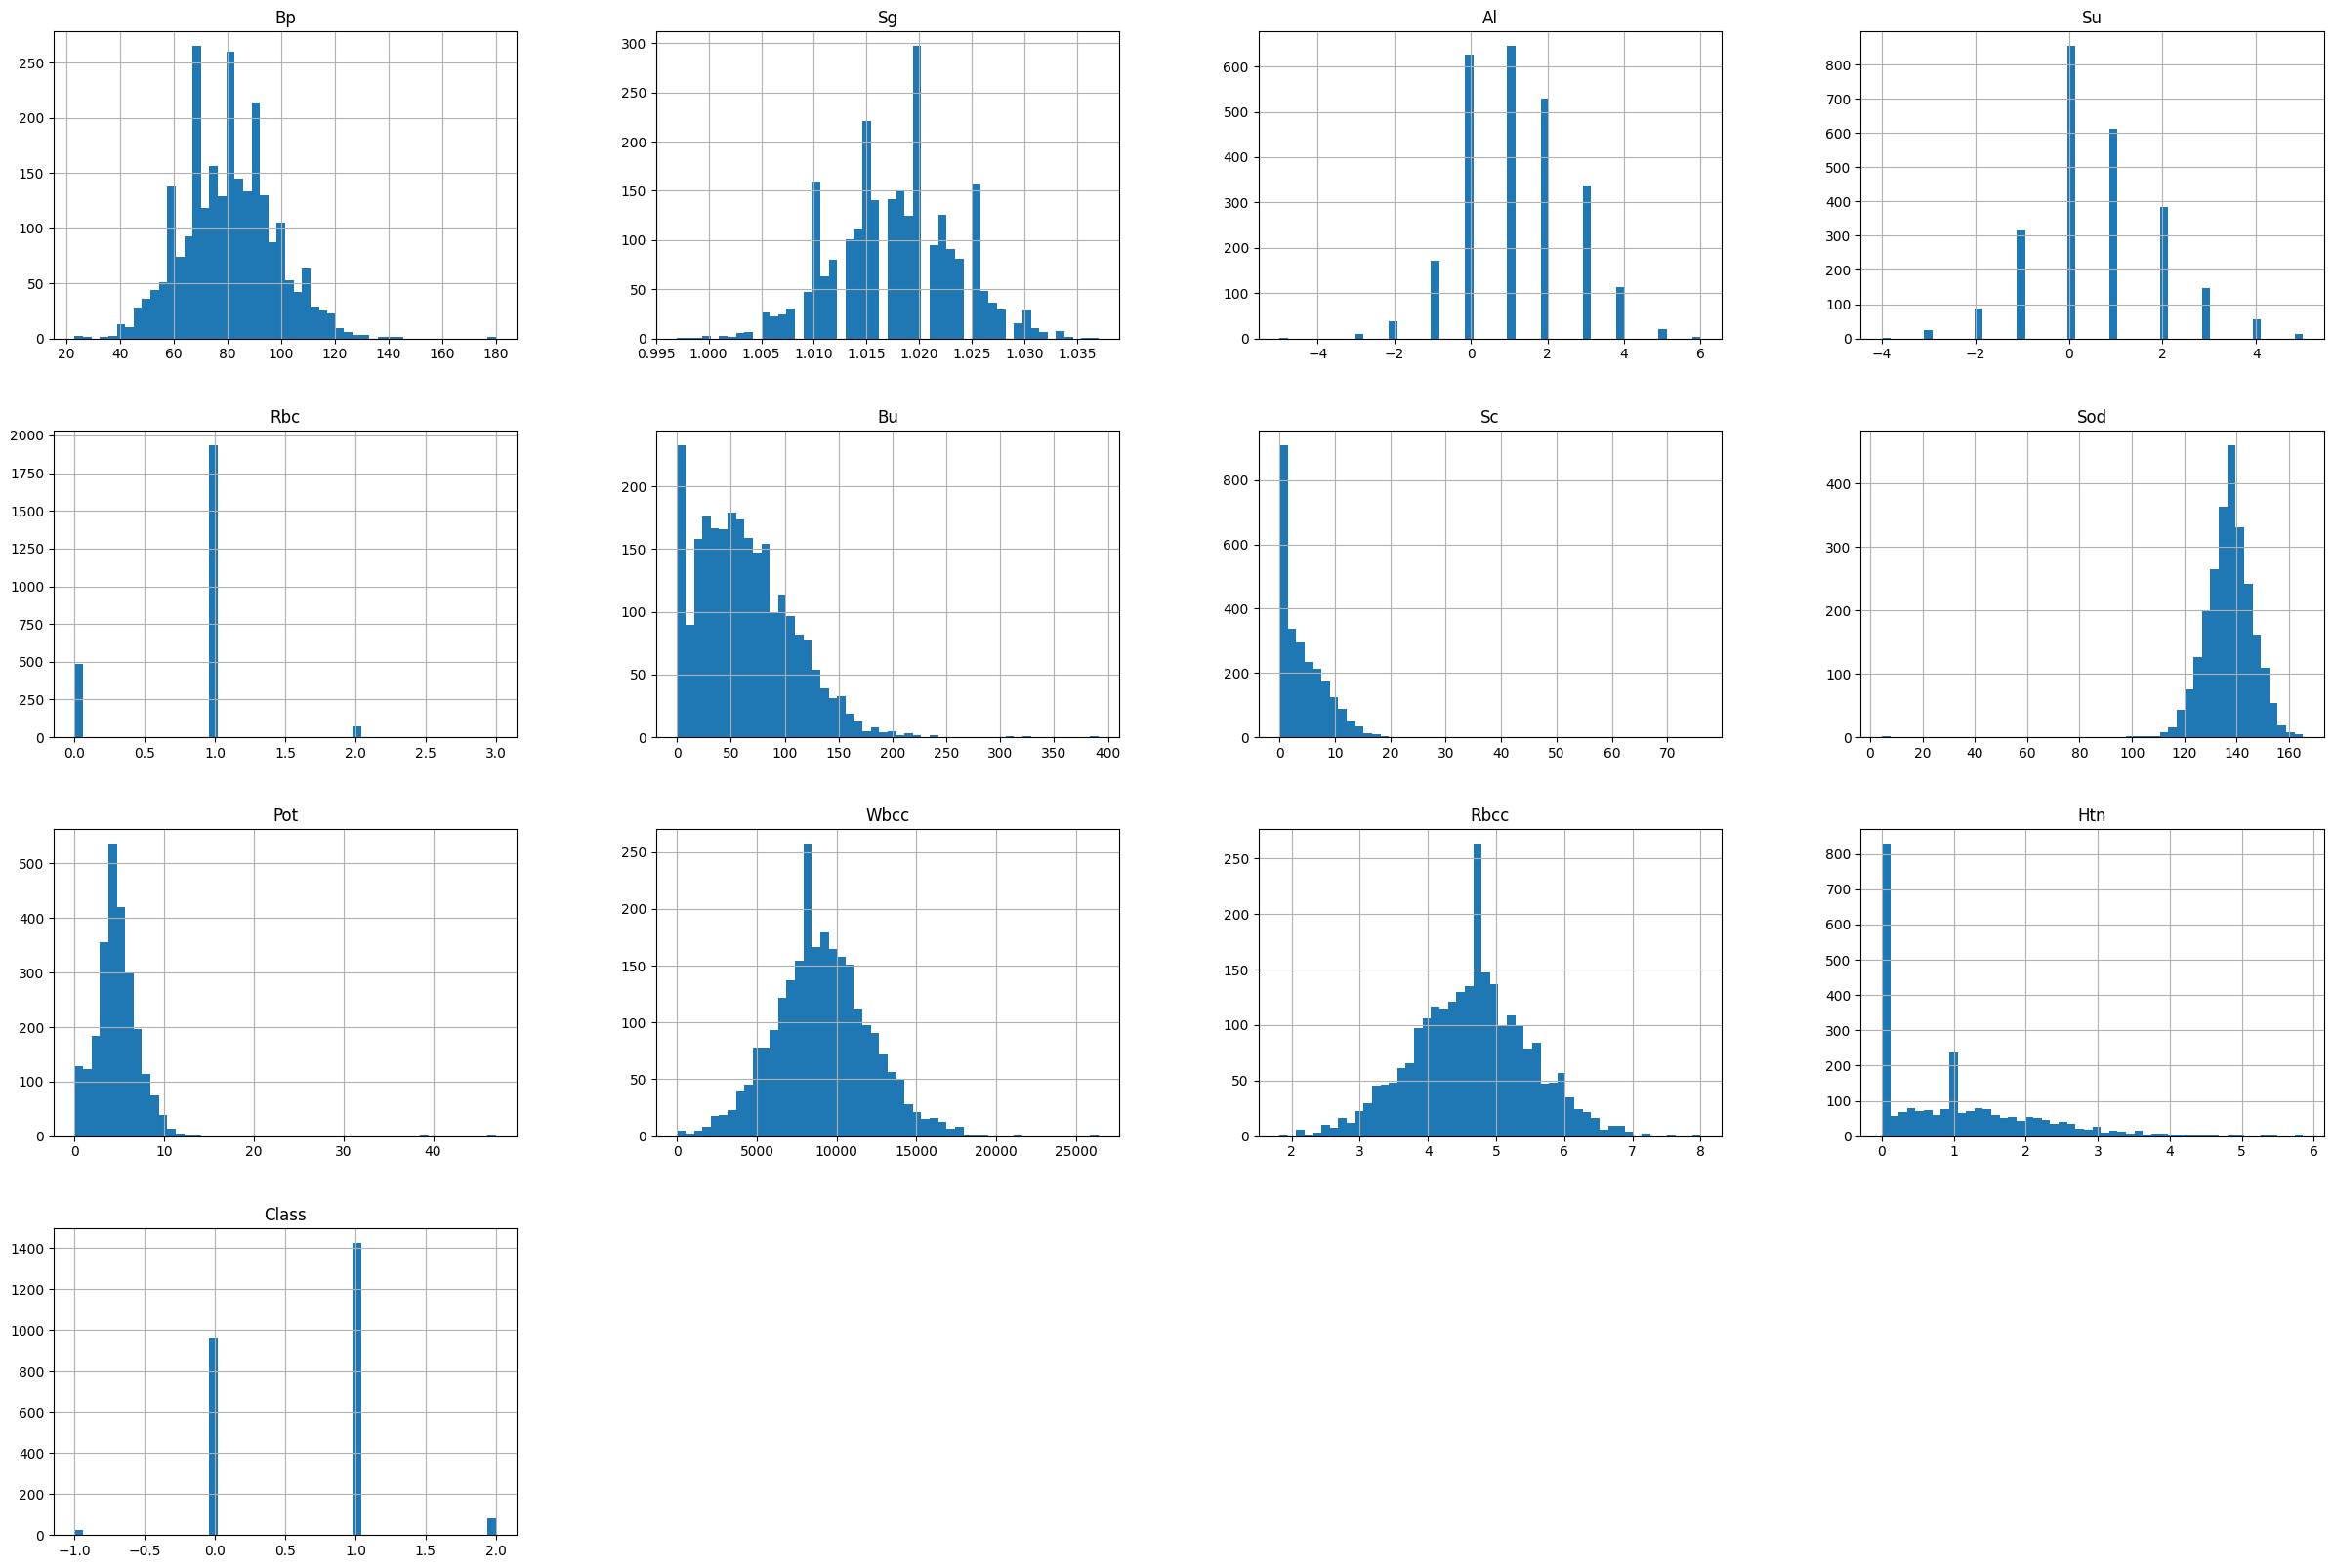

In [86]:
df.hist(bins=50,figsize=(30,20))